# Observations and Insights 

1) Ramicane was the most effective drug regimen among all in this testing.
2) Capomulin was obesrved second best dug regimen in this study which can be seen in box and whisk diagram below.
3) Weight of the mouse is directly proportional to tumor volume that means the more heavy mouse is the more tumour volume it has.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)





In [2]:
pd.set_option('display.max_rows', None)
mouse_metadata.groupby(["Drug Regimen"]).count()

,Mouse ID,Sex,Age_months,Weight (g)
Drug Regimen,,,,
Capomulin,25,25,25,25
Ceftamin,25,25,25,25
Infubinol,25,25,25,25
Ketapril,25,25,25,25
Naftisol,25,25,25,25
Placebo,25,25,25,25
Propriva,25,25,25,25
Ramicane,25,25,25,25
Stelasyn,24,24,24,24


In [3]:
# Combine the data into a single dataset

mouse_study_results = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID"] )


# Display the data table for preview
mouse_study_results.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_count = len(mouse_study_results["Mouse ID"].unique())
mice_count


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_group = mouse_study_results.groupby(["Mouse ID", "Timepoint"])

dup_mice_id = mice_group.filter(lambda x:x['Sex'].count() > 1)

dup_mice_id = (dup_mice_id["Mouse ID"].unique()).tolist()
dup_mice_id

['g989']

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
grouped_mouse_study_results = mouse_study_results.groupby(["Mouse ID"])
duplicate_id_df = grouped_mouse_study_results.filter(lambda x:x["Sex"].count() > 1)

# duplicate_id_df


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

indexed_mouse_study_results_df =  mouse_study_results.set_index("Mouse ID")
cleaned_mouse_study_results_df = indexed_mouse_study_results_df.drop(dup_mice_id,axis=0) # Passed the list of duplicate ID's to the drop method

cleaned_results_df = cleaned_mouse_study_results_df.reset_index()


In [8]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_results_df["Mouse ID"].unique())

248

## Summary Statistics

* Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [9]:
cleaned_results_df["Tumor Volume (mm3)"].describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [10]:

# mean_tumor_vol = mouse_study_results["Tumor Volume (mm3)"].mean()
# mean_tumor_vol

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

grouped_mouse_study_results_df = cleaned_results_df.groupby(["Drug Regimen"]) #grouping data on Drug Regimen

# grouped_mouse_study_results_df.count()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumorvol_by_drug_regimen_mean = grouped_mouse_study_results_df["Tumor Volume (mm3)"].mean()
tumorvol_by_drug_regimen_median = grouped_mouse_study_results_df["Tumor Volume (mm3)"].median()
tumorvol_by_drug_regimen_var = grouped_mouse_study_results_df["Tumor Volume (mm3)"].var()
tumorvol_by_drug_regimen_std = grouped_mouse_study_results_df["Tumor Volume (mm3)"].std()
tumorvol_by_drug_regimen_sem = grouped_mouse_study_results_df["Tumor Volume (mm3)"].sem()
# mousecnt_by_drug_regimen =  grouped_mouse_study_results_df["Mouse ID"].count()


# Assemble the resulting series into a single summary dataframe.

summary_by_regimen_df = pd.DataFrame({ "Mean" : tumorvol_by_drug_regimen_mean ,
                                      "Median" : tumorvol_by_drug_regimen_median ,
                                       "Variance" : tumorvol_by_drug_regimen_var ,
                                       "Standard Deviation" : tumorvol_by_drug_regimen_std ,
                                        "SEM" : tumorvol_by_drug_regimen_sem  
#                                         "Mouse Count" : mousecnt_by_drug_regimen
                                     })
summary_by_regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


 * Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_by_regimen_df_ = grouped_mouse_study_results_df["Tumor Volume (mm3)"].describe()
summary_by_regimen_df_

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

<AxesSubplot:xlabel='Timepoint'>

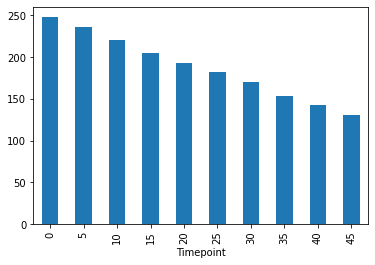

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# pd.set_option('display.max_rows', None)
# cleaned_results_df.rename(columns = {"Mouse ID" : "Mouse_ID"}).groupby(["Drug Regimen"]).Mouse_ID.nunique().plot.bar()
results_plot_df = cleaned_results_df.rename(columns = {"Mouse ID" : "Mouse_ID"}).groupby(["Timepoint"]).Mouse_ID.nunique()
results_plot_df.plot.bar()
# cleaned_results_df.groupby(["Drug Regimen"]).Timepoint.nunique().plot.bar()
# mouse_study_results.groupby(["Timepoint","Drug Regimen"]).count()
# mouse_study_results.groupby(["Drug Regimen","Timepoint"]).Timepoint.count().plot.bar()
# cleaned_results_df.groupby(["Drug Regimen"]).Timepoint.count().plot.bar()
# mouse_study_results.groupby(["Timepoint"]).Timepoint.count().plot.bar()
# mouse_study_results.groupby(["Mouse ID","Drug Regimen"]).Timepoint.count()

In [13]:
results_plot_df.reset_index()

,Timepoint,Mouse_ID
0,0,248
1,5,236
2,10,221
3,15,205
4,20,193
5,25,182
6,30,170
7,35,153
8,40,142
9,45,130


<BarContainer object of 10 artists>

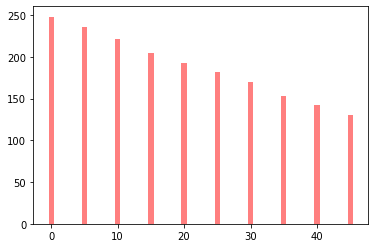

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x=results_plot_df.reset_index()
x_axis = x["Timepoint"]
y_axis = x["Mouse_ID"]
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

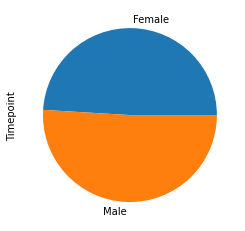

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_results_df.groupby(["Sex"]).Timepoint.count().plot.pie()
s = cleaned_results_df.groupby(["Sex"]).Timepoint.count()

([<matplotlib.patches.Wedge at 0x7fdf23162a90>,
 [Text(0.03308201408261561, 1.0995024239828841, 'female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153967, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

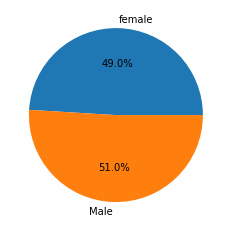

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["female", "Male"]
s = cleaned_results_df.groupby(["Sex"]).Timepoint.count()
plt.pie(s, labels = sex, autopct="%1.1f%%")        


## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_record_df = cleaned_results_df.drop_duplicates(subset=["Mouse ID"],keep='last')

# last_timepoint_df
last_timepoint_df = last_record_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]].rename(columns = {"Timepoint":"Last Timepoint","Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
# last_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_study_results_lasttp = pd.merge(cleaned_results_df, last_timepoint_df, how="inner", on=["Mouse ID"] )
last_timepoint_result_df = mouse_study_results_lasttp[["Mouse ID","Drug Regimen","Last Timepoint","Final Tumor Volume (mm3)"]].drop_duplicates().reset_index()
# last_timepoint_result_df


In [18]:
t = last_timepoint_result_df.groupby(["Drug Regimen"])
Q1 = t["Final Tumor Volume (mm3)"].quantile(.25)
Q3 = t["Final Tumor Volume (mm3)"].quantile(.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 - (1.5*IQR)

tumor_vol_summ_quat = pd.DataFrame({ "Quantile 1" : Q1 ,
                                     "Quantile 3" : Q3 ,
                                     "IQR" : IQR ,
                                     "Lower Bound" :  lower_bound ,
                                    "Upper Bound" : upper_bound
                                   })

tumor_vol_summ_quat

,Quantile 1,Quantile 3,IQR,Lower Bound,Upper Bound
Drug Regimen,,,,,
Capomulin,32.377357,40.159220,7.781863,20.704562,28.486425
Ceftamin,48.722078,64.299830,15.577752,25.355450,40.933202
Infubinol,54.048608,65.525743,11.477135,36.832905,48.310040
Ketapril,56.720095,69.872251,13.152155,36.991862,50.144018
Naftisol,52.079510,69.563621,17.484111,25.853344,43.337455
Placebo,52.942902,68.134288,15.191386,30.155822,45.347208
Propriva,49.119739,62.689368,13.569629,28.765296,42.334925
Ramicane,31.560470,40.659006,9.098537,17.912664,27.011201
Stelasyn,52.476596,69.103944,16.627349,27.535572,44.162921


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = last_timepoint_result_df["Drug Regimen"].unique().tolist()
regimen_list


['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

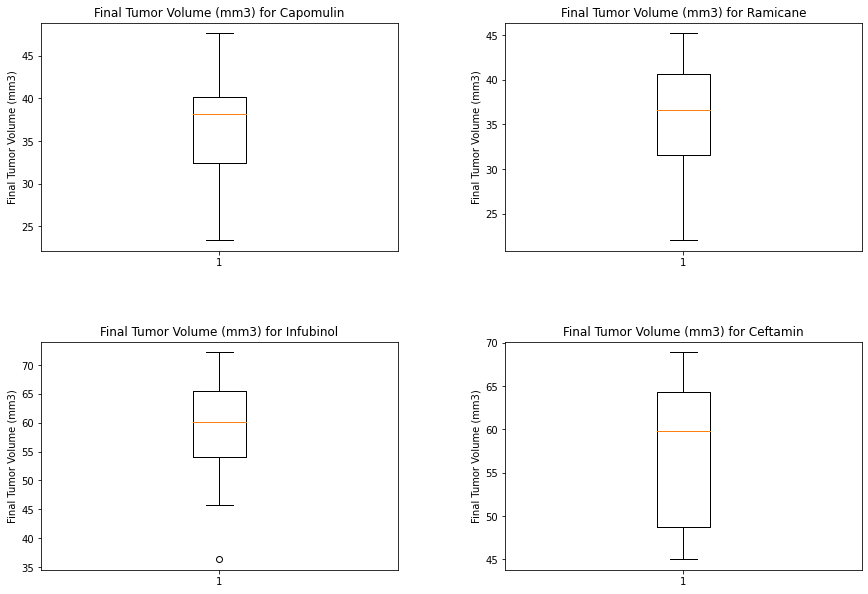

In [20]:


# Create empty list to fill with tumor vol data (for plotting)
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_tumor_list_cap = []
final_tumor_list_ram = []
final_tumor_list_inf = []
final_tumor_list_cef = []

drug_df_cap = last_timepoint_result_df.loc[last_timepoint_result_df["Drug Regimen"]=="Capomulin" ,:]
drug_df_ram = last_timepoint_result_df.loc[last_timepoint_result_df["Drug Regimen"]=="Ramicane" ,:]
drug_df_inf = last_timepoint_result_df.loc[last_timepoint_result_df["Drug Regimen"]=="Infubinol" ,:]
drug_df_cef = last_timepoint_result_df.loc[last_timepoint_result_df["Drug Regimen"]=="Ceftamin" ,:]

final_tumor_list_cap.append(drug_df_cap["Final Tumor Volume (mm3)"])
final_tumor_list_ram.append(drug_df_ram["Final Tumor Volume (mm3)"])
final_tumor_list_inf.append(drug_df_inf["Final Tumor Volume (mm3)"])
final_tumor_list_cef.append(drug_df_cef["Final Tumor Volume (mm3)"])

fig, ax = plt.subplots(2,2)

ax[0,0].set_title('Final Tumor Volume (mm3) for Capomulin')
ax[0,0].set_ylabel('Final Tumor Volume (mm3)')
ax[0,0].boxplot(final_tumor_list_cap)

ax[0,1].set_title('Final Tumor Volume (mm3) for Ramicane')
ax[0,1].set_ylabel('Final Tumor Volume (mm3)')
ax[0,1].boxplot(final_tumor_list_ram)

ax[1,0].set_title('Final Tumor Volume (mm3) for Infubinol')
ax[1,0].set_ylabel('Final Tumor Volume (mm3)')
ax[1,0].boxplot(final_tumor_list_inf)

ax[1,1].set_title('Final Tumor Volume (mm3) for Ceftamin')
ax[1,1].set_ylabel('Final Tumor Volume (mm3)')
ax[1,1].boxplot(final_tumor_list_cef)

fig.subplots_adjust(left=0.1, right=2., bottom=0.1, top=2,
                    hspace=0.4, wspace=0.3)
plt.show()


    

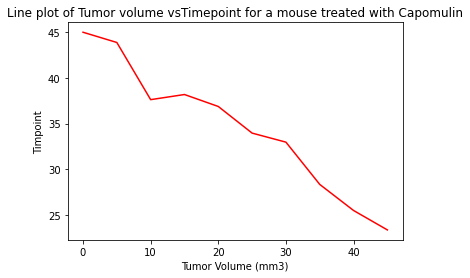

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_results_df = cleaned_results_df.loc[((cleaned_results_df["Drug Regimen"] == "Capomulin") & (cleaned_results_df["Mouse ID"] == "s185")),:]
cap_results_df.reset_index()
timepoint = np.arange(0,50,5)
# timepoint
tumor_vol = np.array(cap_results_df["Tumor Volume (mm3)"])
# # tumor_vol
danger_drop = plt.plot(timepoint, tumor_vol, color="red", label="Tumor Volume (mm3)")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timpoint")
plt.title("Line plot of Tumor volume vsTimepoint for a mouse treated with Capomulin")
plt.show()



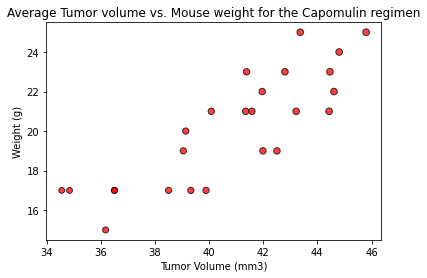

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_results_df = cleaned_results_df.loc[(cleaned_results_df["Drug Regimen"] == "Capomulin"),:]
grouped_cap_results_df = cap_results_df[["Mouse ID","Tumor Volume (mm3)","Weight (g)"]].groupby(cap_results_df["Mouse ID"]).mean()
# grouped_cap_results_df

plt.scatter(grouped_cap_results_df["Tumor Volume (mm3)"], grouped_cap_results_df["Weight (g)"], marker="o", facecolors="red", edgecolors="black",
            s=grouped_cap_results_df["Tumor Volume (mm3)"], alpha=.75)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Average Tumor volume vs. Mouse weight for the Capomulin regimen")
plt.show()


## Correlation and Regression

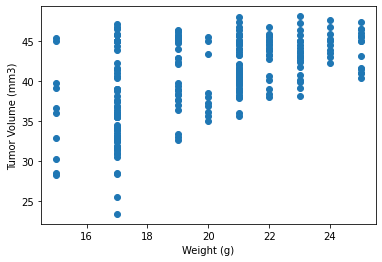

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(cap_results_df.iloc[:,4],cap_results_df.iloc[:,6])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

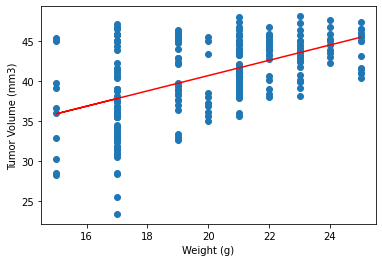

In [24]:
x_values = cap_results_df["Weight (g)"]
y_values = cap_results_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()